In [1]:
#Filled the competitors sku's with the following naming convention naming convention (GLBT L 001 :  "Bottle" "Large" "Brand1") using excel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("data_SKUfilled.xlsx")
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales
0,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650 ml,2014,Apr,2758.0,2659.80
1,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650 ml,2014,Aug,2880.0,2406.69
2,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650 ml,2014,Dec,2880.0,590.46
3,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650 ml,2014,Feb,2758.0,379.47
4,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650 ml,2014,Jan,2758.0,405.44


In [2]:
#Packsize was in string format Xml.  Converted it into X (numerical data type)

df['PackSize'] = df['PackSize'].str[0:3].astype('float64')
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales
0,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Apr,2758.0,2659.80
1,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Aug,2880.0,2406.69
2,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Dec,2880.0,590.46
3,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Feb,2758.0,379.47
4,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Jan,2758.0,405.44


In [3]:
#Added a revenue column to the dataset using the following formula
#Assumption : One carton contains one bottle -> wont affect analysis as the actual numbers will be in proportion

df['revenue'] = df['Volume Sales'] / df['PackSize'] * df['W/s Price (per carton)']*1000
df.head()

,Brewery,Company/Competitor,Brand,Segment,PackType,SKU,PackSize,Year,Month,W/s Price (per carton),Volume Sales,revenue
0,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Apr,2758.0,2659.80,1.128574e+07
1,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Aug,2880.0,2406.69,1.066349e+07
2,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Dec,2880.0,590.46,2.616192e+06
3,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Feb,2758.0,379.47,1.610120e+06
4,Brewer1,Company,Brand 1,Premium,Bottle,GLBTL001,650.0,2014,Jan,2758.0,405.44,1.720313e+06


In [4]:
df['Company/Competitor'].value_counts()

Competitor    2090
Company       1005
Name: Company/Competitor, dtype: int64

In [5]:
#Splitted into company database and competitor database
dfCompany = df[df['Company/Competitor']=="Company"]
dfCompetitor = df[df['Company/Competitor']=="Competitor"]

In [6]:
df["SKU"].unique()


array(['GLBTL001', 'CANL001', 'GLBTL002', 'GLBTL003', 'GLBTL004',
       'CANL003', 'GLBTS001', 'GLBTL005', 'CANS001', 'CANL005', 'CANS005',
       'GLBTS006', 'GLBTL007', 'CANS007', 'CANL007', 'GLBTL008',
       'GLBTL009', 'CANS009', 'CANS002', 'CANS004', 'CANL004', 'GLBTL006',
       'CANL006', 'CANL008', 'CANL002'], dtype=object)

In [7]:
print(dfCompany["SKU"].value_counts())

CANS005     68
CANL007     68
GLBTS001    68
CANL005     68
GLBTL003    68
GLBTL001    68
CANS007     68
GLBTL007    68
GLBTL005    68
GLBTL009    68
GLBTL002    68
CANS001     68
CANL001     49
GLBTS006    39
GLBTL004    30
GLBTL008    26
CANL003     23
CANS009     22
Name: SKU, dtype: int64


In [8]:
#function to plot yearly volume sales of different SKUs

def plot_volume_sales(sku):
  a = [2014,2015,2016,2017,2018,2019]
  df_sku= df[df['SKU']==sku];
  v = []
  for year in a:
    v.append(df_sku[df_sku['Year']==year]['Volume Sales'].sum())
  d = {'Year':[2014,2015,2016,2017,2018,2019],'Volume_Sales': v }
  df_sales = pd.DataFrame(d)
  plt.plot(df_sales["Year"],df_sales["Volume_Sales"],marker='o', linewidth=2, markersize=12)
  

In [9]:
#function to plot yearly revenue of different SKUs

def plot_revenue(sku):
  a = [2014,2015,2016,2017,2018,2019]
  df_sku= df[df['SKU']==sku];
  v = []
  for year in a:
    v.append(df_sku[df_sku['Year']==year]['revenue'].sum())
  d = {'Year':[2014,2015,2016,2017,2018,2019],'Revenue_total': v }
  df_sales = pd.DataFrame(d)
  plt.plot(df_sales["Year"],df_sales["Revenue_total"],marker='o', linewidth=2, markersize=12)
  

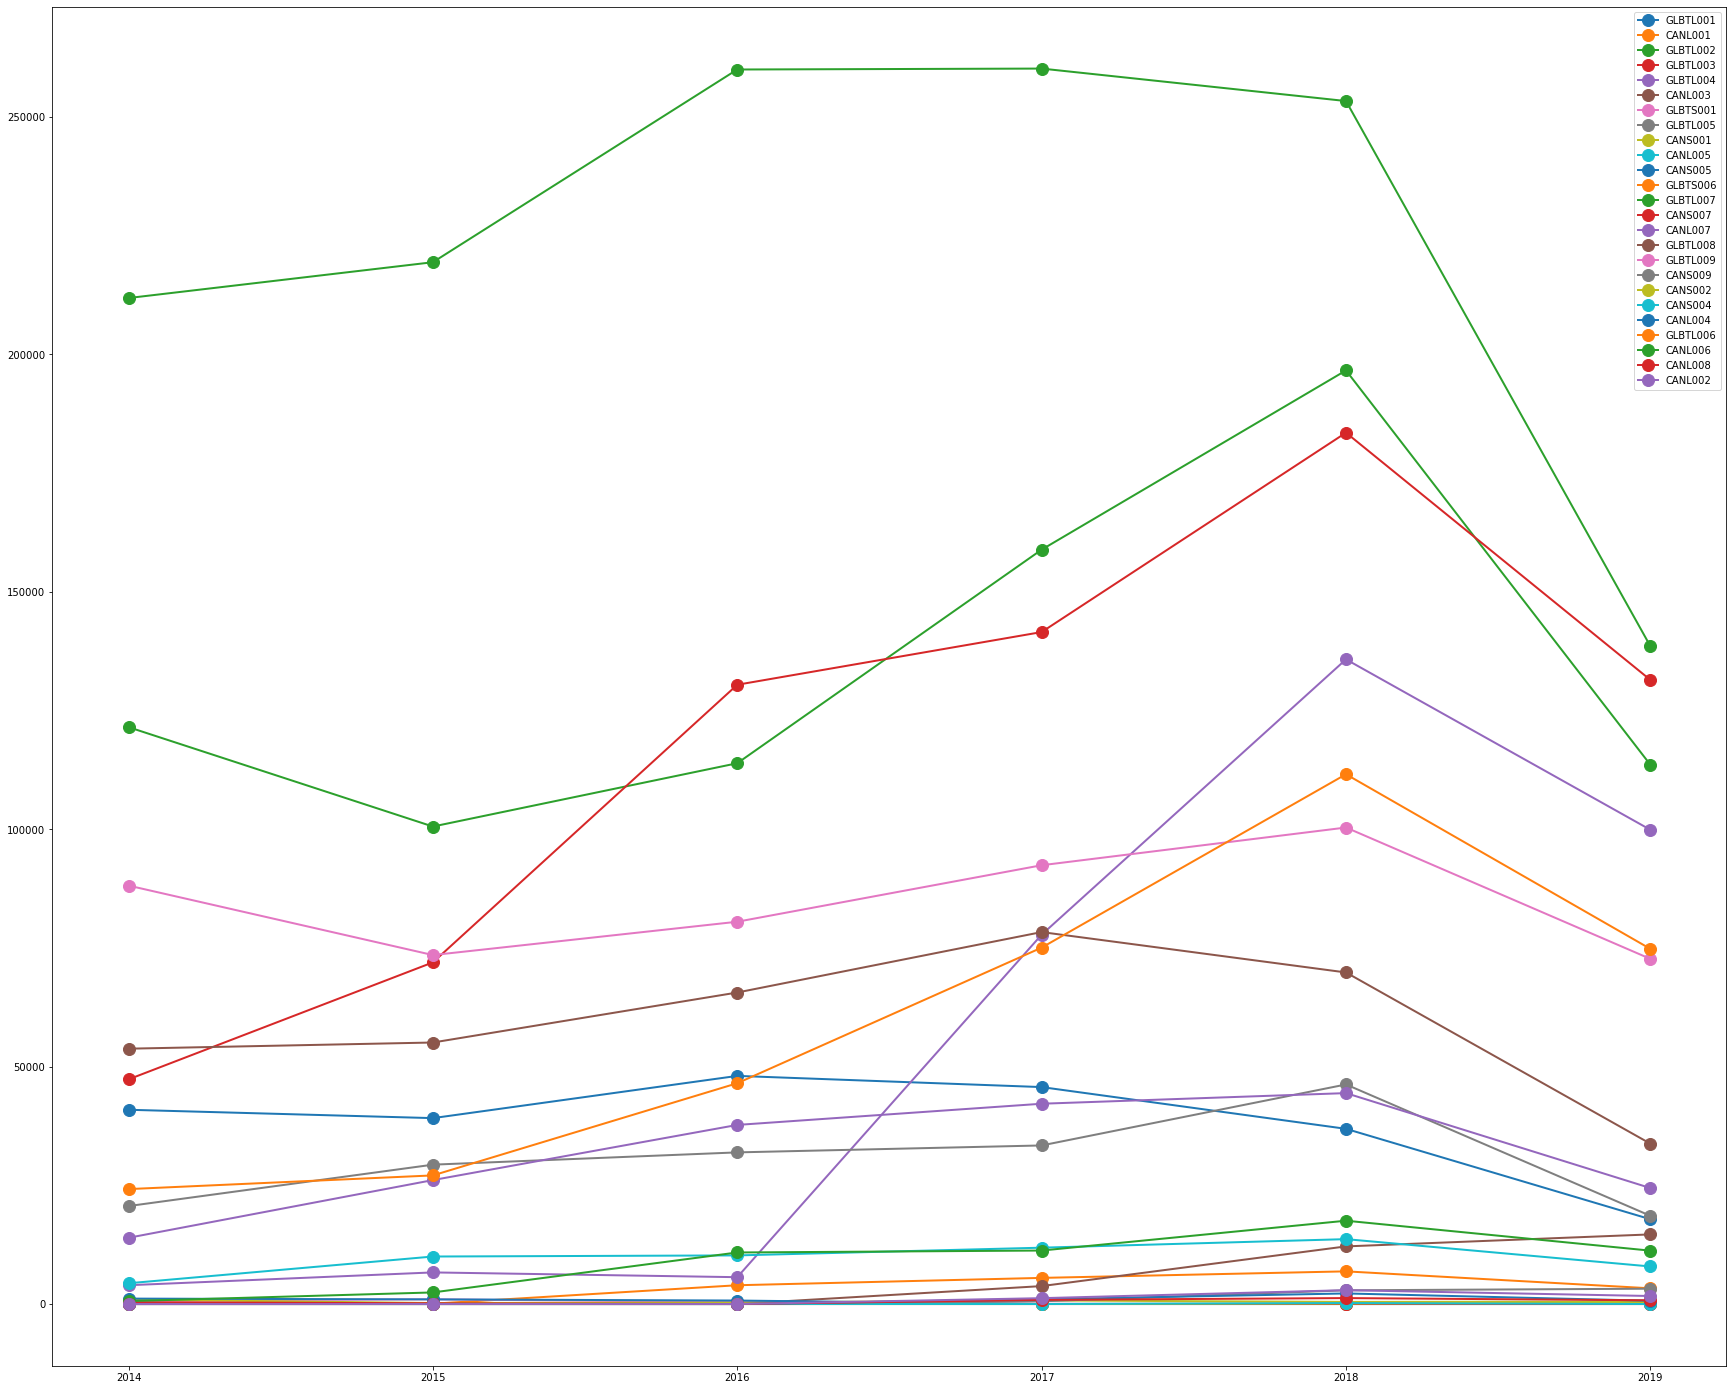

In [10]:
SKUs = ['GLBTL001',
 'CANL001',
 'GLBTL002',
 'GLBTL003',
 'GLBTL004',
 'CANL003',
 'GLBTS001',
 'GLBTL005',
 'CANS001',
 'CANL005',
 'CANS005',
 'GLBTS006',
 'GLBTL007',
 'CANS007',
 'CANL007',
 'GLBTL008',
 'GLBTL009',
 'CANS009',
 'CANS002',
 'CANS004',
 'CANL004',
 'GLBTL006',
 'CANL006',
 'CANL008',
 'CANL002']
plt.figure(figsize=(30,25))
for i in SKUs:
    plot_volume_sales(i)
plt.legend(SKUs)
plt.savefig("Volume_sales_sku_yearly")

# Not so clear to analyse in detail. Only basic data insights can be drawn.

In [11]:
#Detailed demand analysis of different SKUs in sorted order

d_demand = {'SKU' :df['SKU'] , 'demand' : df['Volume Sales'] }
df_demand = pd.DataFrame(d_demand)

total_demand_grouped= df_demand.groupby('SKU').sum()
total_demand_grouped=total_demand_grouped.reset_index()
total_demand_grouped=total_demand_grouped.sort_values(by='demand',ascending=False)
total_demand_grouped

,SKU,demand
20,GLBTL007,1343334.62
15,GLBTL002,804991.70
16,GLBTL003,706147.21
22,GLBTL009,507574.60
19,GLBTL006,359211.31
21,GLBTL008,356388.84
17,GLBTL004,329690.34
14,GLBTL001,228550.53
6,CANL007,188800.62
18,GLBTL005,180133.09


In [12]:
dict ={}
for sku in SKUs :
    dict [sku] = df[df['SKU']==sku]['Segment'].unique()
    
dict


{'GLBTL001': array(['Premium', 'Economy', 'L Mainstream', 'U Mainstream'], dtype=object),
 'CANL001': array(['Premium', 'Economy', 'U Mainstream'], dtype=object),
 'GLBTL002': array(['U Mainstream', 'Economy', 'L Mainstream'], dtype=object),
 'GLBTL003': array(['L Mainstream', 'Economy', 'U Mainstream'], dtype=object),
 'GLBTL004': array(['Economy', 'U Mainstream', 'L Mainstream'], dtype=object),
 'CANL003': array(['L Mainstream'], dtype=object),
 'GLBTS001': array(['Premium'], dtype=object),
 'GLBTL005': array(['L Mainstream', 'Economy'], dtype=object),
 'CANS001': array(['Premium', 'L Mainstream'], dtype=object),
 'CANL005': array(['L Mainstream'], dtype=object),
 'CANS005': array(['L Mainstream'], dtype=object),
 'GLBTS006': array(['Premium'], dtype=object),
 'GLBTL007': array(['U Mainstream', 'Economy'], dtype=object),
 'CANS007': array(['U Mainstream'], dtype=object),
 'CANL007': array(['U Mainstream'], dtype=object),
 'GLBTL008': array(['U Mainstream', 'Economy'], dtype=object),


In [13]:
d_demand = {'SKU' :dfCompany['SKU'] , 'company_demand' : dfCompany['Volume Sales'] }
df_demand_company = pd.DataFrame(d_demand)

company_demand_grouped= df_demand_company.groupby('SKU').sum()
company_demand_grouped=company_demand_grouped.reset_index()
company_demand_grouped=company_demand_grouped.sort_values(by='company_demand',ascending=False)
company_demand_grouped

,SKU,company_demand
13,GLBTL007,1339192.83
10,GLBTL003,656084.99
15,GLBTL009,500089.35
11,GLBTL004,281852.75
3,CANL007,188800.62
9,GLBTL002,171013.59
12,GLBTL005,147147.46
8,GLBTL001,99615.10
2,CANL005,42652.44
1,CANL003,30574.14


In [14]:
d_demand = {'SKU' :dfCompetitor['SKU'] , 'competitor_demand' : dfCompetitor['Volume Sales'] }
df_demand_competitor = pd.DataFrame(d_demand)

competitor_demand_grouped= df_demand_competitor.groupby('SKU').sum()
competitor_demand_grouped=competitor_demand_grouped.reset_index()
competitor_demand_grouped=competitor_demand_grouped.sort_values(by='competitor_demand',ascending=False)
competitor_demand_grouped

,SKU,competitor_demand
10,GLBTL002,633978.11
14,GLBTL006,359211.31
16,GLBTL008,346324.18
9,GLBTL001,128935.43
4,CANL006,53965.52
11,GLBTL003,50062.22
12,GLBTL004,47837.59
13,GLBTL005,32985.63
3,CANL005,15404.74
17,GLBTL009,7485.25


In [15]:
total_demand_grouped=total_demand_grouped.set_index('SKU').join(company_demand_grouped.set_index('SKU'))
total_demand_grouped.to_excel('Top_sku_demands.xlsx')

# Demand (Volume sales) of company , competitor grouped together and sent to excel for further analysis.


In [16]:
#Detailed revenue analysis of different SKUs in sorted order

d_rev = {'SKU' :df['SKU'] , 'revenue' : df['revenue'] }
df_rev = pd.DataFrame(d_rev)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
total_rev_grouped= df_rev.groupby('SKU').sum().round(0)
total_rev_grouped=total_rev_grouped.reset_index()
total_rev_grouped=total_rev_grouped.sort_values(by='revenue',ascending=False)
total_rev_grouped

,SKU,revenue
20,GLBTL007,6084843082
15,GLBTL002,2831115919
16,GLBTL003,2461449771
22,GLBTL009,2028159748
19,GLBTL006,1288985961
17,GLBTL004,1127096897
21,GLBTL008,1070102806
14,GLBTL001,919502640
6,CANL007,844436624
18,GLBTL005,679731113


In [17]:
d_rev_c = {'SKU' :dfCompany['SKU'] , 'revenue_company' : dfCompany['revenue'] }
df_rev_c = pd.DataFrame(d_rev_c)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
c_rev_grouped= df_rev_c.groupby('SKU').sum().round(0)
c_rev_grouped=c_rev_grouped.reset_index()
c_rev_grouped=c_rev_grouped.sort_values(by='revenue_company',ascending=False)
c_rev_grouped

,SKU,revenue_company
13,GLBTL007,6073845164
10,GLBTL003,2278229499
15,GLBTL009,2008662941
11,GLBTL004,947679051
3,CANL007,844436624
9,GLBTL002,680508315
12,GLBTL005,550080827
8,GLBTL001,495066643
2,CANL005,158604742
1,CANL003,123436770


In [18]:
total_rev_grouped=total_rev_grouped.set_index('SKU').join(c_rev_grouped.set_index('SKU'))
total_rev_grouped.to_excel('top_skus_revenues.xlsx')

# Revenue of company , competitor grouped together and sent to excel for further analysis.

In [19]:
revenue_by_company_bottle= dfCompany[dfCompany['PackType']=='Bottle']['revenue'].sum()
revenue_by_company_can= dfCompany[dfCompany['PackType']=='CAN']['revenue'].sum()
revenue_by_competitor_bottle= dfCompetitor[dfCompetitor['PackType']=='Bottle']['revenue'].sum()
revenue_by_competitor_can= dfCompetitor[dfCompetitor['PackType']=='CAN']['revenue'].sum()

In [20]:
print(f"Company revenue from bottle : {revenue_by_company_bottle} \nCompany revenue from Can : {revenue_by_company_can} \nCompetitor Revenue from Bottle : {revenue_by_competitor_bottle} \nCompetitor Revenue from Can : {revenue_by_competitor_can} ")
print("\n")
print(f"Company bottle market share : {(revenue_by_company_bottle*100 )/ (revenue_by_company_bottle+revenue_by_competitor_bottle)}")
print(f"Company can market share : {(revenue_by_company_can*100) / (revenue_by_company_can+revenue_by_competitor_can)}")

Company revenue from bottle : 13105936924.496803 
Company revenue from Can : 1251871669.5232725 
Competitor Revenue from Bottle : 5407319001.103003 
Competitor Revenue from Can : 382152537.02756727 


Company bottle market share : 70.79217711442179
Company can market share : 76.61279829910052


In [21]:
#Segment Analysis

dfCompany['Segment'].value_counts()

U Mainstream    388
L Mainstream    295
Premium         292
Economy          30
Name: Segment, dtype: int64

In [22]:
dfCompetitor['Segment'].value_counts()

Economy         1197
L Mainstream     719
U Mainstream     174
Name: Segment, dtype: int64

In [23]:
revenue_premium_company = dfCompany[dfCompany['Segment']=='Premium']['revenue'].sum()
revenue_economy_company = dfCompany[dfCompany['Segment']=='Economy']['revenue'].sum()
revenue_U_main_company  = dfCompany[dfCompany['Segment']=='U Mainstream']['revenue'].sum()
revenue_L_main_company  = dfCompany[dfCompany['Segment']=='L Mainstream']['revenue'].sum()

revenue_premium_competitor = dfCompetitor[dfCompetitor['Segment']=='Premium']['revenue'].sum()
revenue_economy_competitor = dfCompetitor[dfCompetitor['Segment']=='Economy']['revenue'].sum()
revenue_U_main_competitor  = dfCompetitor[dfCompetitor['Segment']=='U Mainstream']['revenue'].sum()
revenue_L_main_competitor  = dfCompetitor[dfCompetitor['Segment']=='L Mainstream']['revenue'].sum()




In [24]:
revenue_segment = pd.DataFrame()
revenue_segment['Player'] = ['Company','Competitor']
revenue_segment['Premium'] = [revenue_premium_company,revenue_premium_competitor]
revenue_segment['U_main'] = [revenue_U_main_company,revenue_U_main_competitor]

revenue_segment['L_main'] = [revenue_L_main_company,revenue_L_main_competitor]
revenue_segment['Economy'] = [revenue_economy_company,revenue_economy_competitor]

pd.set_option('display.float_format', lambda x: '%.0f' % x)
revenue_segment.head()


,Player,Premium,U_main,L_main,Economy
0,Company,584147251,9694233377,3131748915,947679051
1,Competitor,0,193826209,3304621109,2291024220


In [25]:
dfCompany['Segment'].unique()

array(['Premium', 'U Mainstream', 'L Mainstream', 'Economy'], dtype=object)

In [26]:
# Market share of Company in different segments
print(f"Company premium market share : {(revenue_premium_company*100 )/ (revenue_premium_company+revenue_premium_competitor)}")
print(f"Company economy market share : {(revenue_economy_company*100) / (revenue_economy_company+revenue_economy_competitor)}")
print(f"Company U Mainstream market share : {(revenue_U_main_company*100) / (revenue_U_main_competitor+revenue_U_main_company)}")
print(f"Company L Mainstream market share : {(revenue_L_main_company*100) / (revenue_L_main_company+revenue_L_main_competitor)}")



Company premium market share : 100.0
Company economy market share : 29.261064439234914
Company U Mainstream market share : 98.03979529449941
Company L Mainstream market share : 48.657067626249415


In [27]:
#Generating plots for different market segments
segments = ['Economy', 'L Mainstream', 'Premium', 'U Mainstream']

for segment in segments:
    df_seg_company = dfCompany[dfCompany['Segment']==segment]
    d = {'per carton' :df_seg_company['W/s Price (per carton)'] , 'revenue' : df_seg_company['revenue'] }
    df_compnay_seg_new = pd.DataFrame(d)

    df_compnay_seg_new['per carton'] = (df_compnay_seg_new['per carton'] / 100).round(0)
    df_compnay_seg_new
    xx_comp= df_compnay_seg_new.groupby('per carton').sum()
    xx_comp=xx_comp.reset_index()

    plt.plot(xx_comp['per carton'],xx_comp['revenue'],marker='o', linewidth=2, markersize=12)

    df_seg_competitor = dfCompetitor[dfCompetitor['Segment']==segment]
    d = {'per carton' :df_seg_competitor['W/s Price (per carton)'] , 'revenue' : df_seg_competitor['revenue'] }
    df_seg_competitor_new = pd.DataFrame(d)

    df_seg_competitor_new['per carton'] = (df_seg_competitor_new['per carton'] / 100).round(0)
    df_seg_competitor_new
    xx= df_seg_competitor_new.groupby('per carton').sum()
    xx=xx.reset_index()

    plt.plot(xx['per carton'],xx['revenue'],color="orange",marker='o', linewidth=2, markersize=12)

    plt.legend(['company','competitor'])
    plt.title(f"{segment}")
    plt.savefig(f"{segment}")

    plt.clf()

<Figure size 432x288 with 0 Axes>

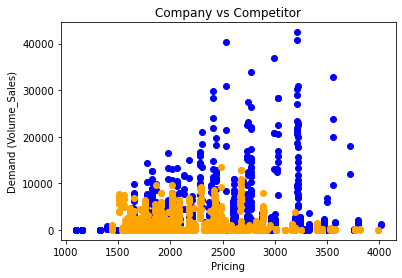

In [28]:
# Tried to plot a general demand vs pricing for both company and competitor

plt.scatter(dfCompany["W/s Price (per carton)"],dfCompany["Volume Sales"],color='blue')
plt.scatter(dfCompetitor["W/s Price (per carton)"],dfCompetitor["Volume Sales"],color='orange')
plt.xlabel('Pricing')
plt.ylabel('Demand (Volume_Sales)')
plt.title('Company vs Competitor')
plt.savefig('Company vs Competitor_Demand vs Pricing')

#Company has more demand of its products when they are placed around a pricing of Rs3100 in general.

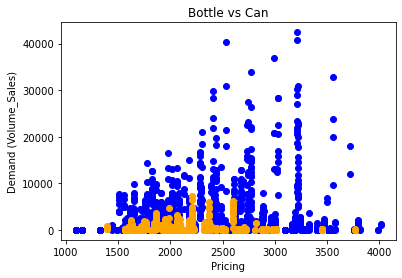

In [29]:
# identifying product market fit. Bottle vs Can. demand and pricing
df_bottle = df[df["PackType"]=="Bottle"]
df_can = df[df["PackType"]=="CAN"]

plt.scatter(df_bottle["W/s Price (per carton)"],df_bottle["Volume Sales"],color='blue')
plt.scatter(df_can["W/s Price (per carton)"],df_can["Volume Sales"],color='orange')
plt.xlabel('Pricing')
plt.title('Bottle vs Can')
plt.ylabel('Demand (Volume_Sales)')
plt.savefig('Bottle vs Can_Demand vs Pricing')

# Clearly Bottles are in more demand. Pricing point arounf 3200 has given the maximum demand.

In [30]:
df['PackSize'].unique()

array([650., 500., 330., 250.])

<BarContainer object of 4 artists>

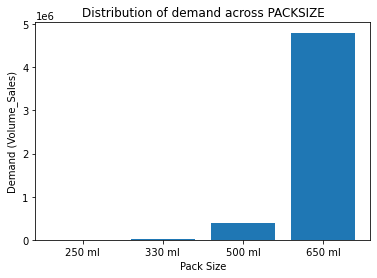

In [31]:
#identifying which capacity bottles are in most demand in the market

df_250 = df[df["PackSize"]==250]
df_330 = df[df["PackSize"]==330]
df_500 = df[df["PackSize"]==500]
df_650 = df[df["PackSize"]==650]

sum_250=df_250["Volume Sales"].sum()
sum_330=df_330["Volume Sales"].sum()
sum_500=df_500["Volume Sales"].sum()
sum_650=df_650["Volume Sales"].sum()

pack_size_dict = {"250 ml" : sum_250, "330 ml": sum_330,"500 ml":sum_500,"650 ml":sum_650}
volume = list(pack_size_dict.keys())
sales = list(pack_size_dict.values())
plt.xlabel('Pack Size')
plt.title('Distribution of demand across PACKSIZE')
plt.ylabel('Demand (Volume_Sales)')
plt.bar(volume,sales)
#plt.savefig('Distribution of demand across PACKSIZE')

#Bottles with 650 ml are clearly more in demand in the market.

In [32]:
# Brand Analysis : To identify the brand performance under company and competitor

def plot_salesb(brand):
  a = [2014,2015,2016,2017,2018,2019]
  dfCompany = df[df['Company/Competitor']=="Company"]
  dfCompetitor = df[df['Company/Competitor']=="Competitor"]
  df_sku= df[df['Brand']==brand]
  df_sku1= dfCompany[dfCompany['Brand']==brand]
  df_sku2= dfCompetitor[dfCompetitor['Brand']==brand]
  v = []
  w = []
  x = []
  for year in a:
    v.append(df_sku[df_sku['Year']==year]['revenue'].sum())
    w.append(df_sku1[df_sku1['Year']==year]['revenue'].sum())
    x.append(df_sku2[df_sku2['Year']==year]['revenue'].sum())
  d = {'Year':[2014,2015,2016,2017,2018,2019],'revenue': v }
  e = {'Year':[2014,2015,2016,2017,2018,2019],'revenue': w }
  f = {'Year':[2014,2015,2016,2017,2018,2019],'revenue': x }
  df_sales = pd.DataFrame(d)
  df_sales1 = pd.DataFrame(e)
  df_sales2 = pd.DataFrame(f)
  merge = pd.merge(df_sales1,df_sales2,on='Year')
  # print(merge)
  plt.plot(df_sales1["Year"],df_sales1["revenue"],marker='o', linewidth=2, markersize=12)
  plt.plot(df_sales2["Year"],df_sales2["revenue"],marker='x', linewidth=2, markersize=12)
    

In [33]:
# By Analysis, we can to the conclusion that the company is performing better in 1,3,4,5,7,9 
# The competitor is performing better in 2,6,8. The company can focus on these brands.

Brands = ['Brand 1','Brand 2','Brand 3','Brand 4','Brand 5','Brand 6','Brand 7','Brand 8','Brand 9']
for i in Brands:
    plot_salesb(i)
    plt.title(i)
    # plt.savefig(i)
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [34]:
#SKU Analysis under the Competitor

SKUs = dfCompetitor['SKU'].unique()
for SKU in SKUs:
    df_seg_competitor = dfCompetitor[dfCompetitor['SKU']==SKU]
    d = {'per carton' :df_seg_competitor['W/s Price (per carton)'] , 'demand' : df_seg_competitor['Volume Sales'] }
    df_seg_competitor_new = pd.DataFrame(d)

    df_seg_competitor_new['per carton'] = (df_seg_competitor_new['per carton'] / 100).round(0)
    df_seg_competitor_new
    xx= df_seg_competitor_new.groupby('per carton').sum()
    xx=xx.reset_index()

    plt.plot(xx['per carton'],xx['demand'],color="orange",marker='o', linewidth=2, markersize=12)
    plt.legend(['competitor'])
    plt.title(f"{SKU}")
    #plt.savefig(f"{SKU}")
    plt.clf()

<Figure size 432x288 with 0 Axes>